# TD - Rotation d'image

| Image source | Rotation horaire d'un quart de tour|
| :--: | :--: |
| 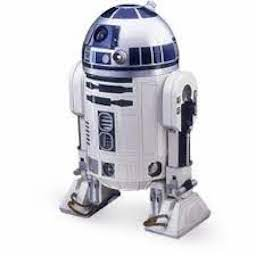 | 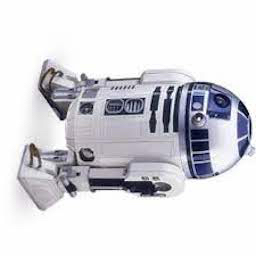 |

## 1. Contexte

Une __image numérique__ est constituée de pixels colorés. Le fichier comportant l’image numérique contient alors une succession de valeurs qui codent la couleur de chaque pixels. En codage RGB, la couleur d'un pixel est codée par un triplet de valeurs.

L'objectif de cette séance est de découvrir les algorithmes de __rotation d'image__ numérique et de les implémenter dans un fichier `rotation.py`.

Nous nous limiterons au cas de la rotation d'un quart de tour dans le sens horaire (à droite).

Nous serons amené à écrire en Python ces algorithmes, en utilisant la bibliothèque PIL de manipulation des pixels d'une image numérique.

Ci-dessous, un extrait de code permettant d'afficher une image grâce à la bibliothèque PIL.

```python
from PIL import Image

source = Image.open("r2d2.jpg")
largeur, hauteur = source.size

print("largeur :", largeur, "Hauteur :", hauteur)

source.show()
```

## 2. Première approche : La permutation de pixels

Soient 2 pixels $A$ et $B$, de coordonnées respectives ($x_a, y_a$) et ($x_b, y_b$) d'une image de définition $n \times n$.

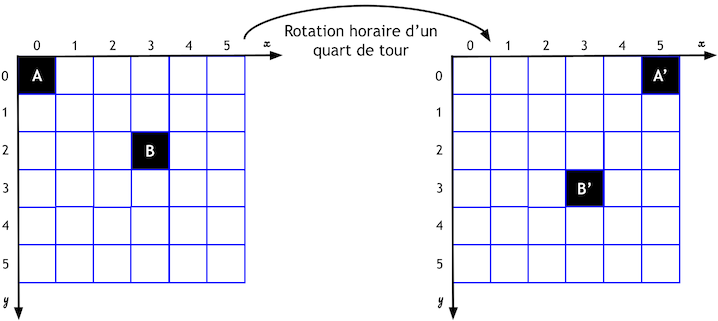

Les pixels $A'$ et $B'$ représentent la transformation de rotation horaire d'un quart de tour des pixels $A$ et $B$.

❓__À Faire 1__ : Répondre aux questions suivantes.

1. Quelles sont les coodonnées des pixels $A'$ et $B'$ en fonction des coordonnées de $A$ et $B$ après transformation ?
2. Généraliser pour un pixel $p$ de coordonnées ($x, y$) et son pixel transformé $p'$ de coordonnées ($x', y'$).

Réponse ici

💻 __À Faire 2__ :

1. Compléter le script de la fonction `rotation` qui a objet de réaliser la transformation d'une image, d’un quart de tour, dans le sens horaire.
```python
def rotation(image):
    n = image.size[0] # image carre donc hauteur = largeur

    resultat = Image.new('RGB', (n, n))

    for y in range(n):
        for x in range(n):
            x_prime = ...
            y_prime = ...
            resultat.putpixel((x_prime, y_prime), ...)

    return resultat
```
2. Donner la complexité en temps et en espace de cet algorithme.

Réponse ici

## 3. Deuxième approche : Diviser pour régner

On cherche maintenant à effectuer cette transformation, sans utiliser de nouvelle image comme précédemment. Ce sera une méthode dite en $\mathcal{O}(1)$ du point de vue de la complexité spatiale.

### 3.1. Principe

Dans cet algorithme :

- l'image est divisée récursivement en 4 "sous-images" de dimensions 2 fois plus petites
- une rotation de 1/4 de tour des 4 sous-images est faite; pour réaliser cette rotation, une permutation circulaire des 4 sous-images est faite, qui est réalisée en échangeant dans un certain ordre les sous-images (voir algorithme ci-dessous)
- Il s'agit d'un algorithme récursif : le cas de base est obtenu quand les "sous-images" ne sont plus constituées que d'un unique pixel, et dans ce cas, il est inutile de faire quoi que ce soit.

### 3.2. Fonctions utilitaires

Nous allons tout d'abord coder deux fonctions _non récursives_ qui seront utilisée par l'algorithme précédent.

💻 __À Faire 3__ : Compléter la procédure `echanger_pixel` qui échange les pixels de coordonnées (x0, y0) et (x1, y1) d'une image passée en paramètre.

```python
def echanger_pixel(image, x0, y0, x1, y1):
    """
	Échange la valeur de deux pixels
	:param image: (Image) image d'origine
	:param x0, y0: (int) Coordonnées du premier pixel				
	:param x1, y1: (int) Coordonnées du deuxième pixel
    :Effet de bord: Les valeurs des 2 pixels sont échangées
	"""
    a = image.getpixel((x0, y0))
    b = image.getpixel((x1, y1))
    image.putpixel((x0, y0), ...)
    image.putpixel((x1, y1), ...)
```

In [ ]:
# Réponse


💻 __À Faire 4__ : Compléter la procédure `echanger_sous_images()` utilisant la fonction précédente et qui échange tous les pixels de deux sous-images de taille identique $n$, et dont les coordonnées du premier point sont passées en paramètre.


```python
def echanger_sous_images(image, x0, y0, x1, y1, n):
    """
	Échange la valeur de deux pixels
	:param image: (Image) image d'origine
	:param x0, y0: (int) Coordonnées du premier pixel de la 1ère sous-image				
	:param x1, y1: (int) Coordonnées du premier pixel de la 2ème sous-image	
    :param n: (int) définition des sous-images
    :Effet de bord: Les valeurs des pixels sont échangées
	"""
    for i in range(n):
        for j in range(n):
            echanger_pixel(image, ...)
```

Cette procédure permet d’echanger les pixels de 2 zones carrées de même dimensions.

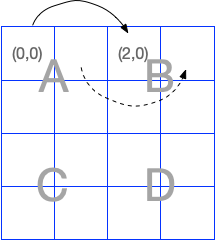

Exemple d'échange des blocs A et B.

In [ ]:
# Réponse


❓__À Faire 5__ : 

1. On veut echanger les blocs A et D, qui font chacun 120 x 120 pixels. Quelle instruction faut-il écrire, utilisant la procedure `echanger_sous_images`.
2. Même question pour echanger les blocs A et C.

Réponse ici

### 3.3. Algorithme de rotation

La procédure permet de faire tourner l’image d’un quart de tour par une méthode de type __diviser pour régner__.

Une fois la partie __divisée__ executée (appels recursifs), lorsque les subdivisions de l’image sont constituées d’un seul pixel, les pixels sont déplacés à l’aide de 3 permutations successives, selon le schéma suivant:

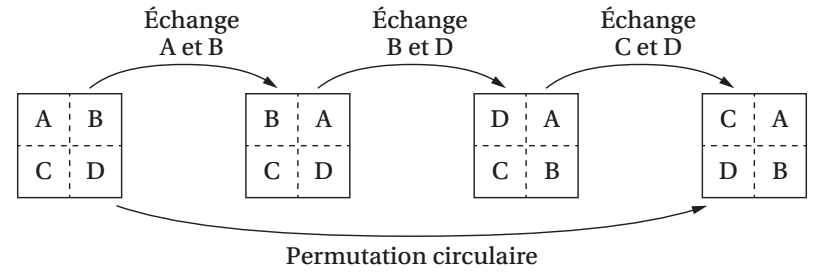

Il sont alors recombinés pour reformer l’image, tout en suivant les mêmes permutations, mais avec des blocs de pixels plus gros.

💻 __À Faire 6__ : Compléter la procédure `rotation_sous_images()` utilisant les fonctions précédentes et qui effectue la rotation d'une image selon le principe de diviser pour régner.


```python
def rotation_sous_images(image, x0, y0, n):
    if n >= 2:
        m = n // 2
        rotation_sous_images(image, x0, y0, m)         # haut gauche
        rotation_sous_images(image, x0, y0 + m, m)     # bas gauche
        rotation_sous_images(image, x0 + m, y0, m)     # haut droite
        rotation_sous_images(image, x0 + m, y0 + m, m) # bas droite
        echanger_sous_images(image, x0, y0, ..., ..., m) # haut gauche <-> haut droite
        echanger_sous_images(image, x0, y0, ..., ..., m) # haut gauche <-> bas droite
        echanger_sous_images(image, x0, y0, ..., ..., m) # haut gauche <-> bas gauche
```

__N.B__ : Il est possible d'appeler la méthode sur l'image `r2d2.jpg` par l'instruction `rotation_sous_images(image, 0, 0, image.size[0])` où `image` est l'image préalablement chargée.

In [ ]:
# Réponse


## 4. Complexité

On montre ( hors-programme ) que la complexité temporelle de cet algorithme est $\mathcal{O}(n^2\log(n))$, moins bonne que celle du précédent, ce qui fait qu'il n'est en réalité pas utilisé dans la pratique du fait de sa lenteur.

Par contre, que peut-on dire de la complexité spatiale de cet algorithme ?

Réponse ici